# Netflix Stock Price Prediction ML Project

#### Mohamed Youssef Abdelnasser - 211001821


## Index

[Including Necessary Libraries](#libs)
<br>
[Data Preprocessing](#dataset)
<br>
[Data Visualization](#vis)
<br>
[Random Forest Model](#m1)
<br>
[Polynomial Regression Model](#m2)
<br>
[Ada Boost Model](#m3)
<br>
[Model Comparison](#compare)


## Including Necessary Libraries <a id='libs'></a>


In [1]:
# Python built-in libraries
import datetime as dt
import time
import warnings

# Libraries for preprocessing and visualizing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# ML models evaluation metrics
from sklearn import metrics

# Sklearn ML models classes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import AdaBoostRegressor

In [2]:
# Disabling warnings
def warn(*args, **kwargs):
    pass


warnings.warn = warn

## Data Preprocessing <a id='dataset'></a>


### Data Gathering

The data set that will be used is collected from finance.yahoo, the collected data spans from January 2nd, 2018,
<br>till December 30th, 2022, with about a daily step interval


In [3]:
# Importing the dataset csv file
NFLX_df = pd.read_csv("./NFLX.csv")

NFLX_df.sample(10)  # Showing 10 random records

,Date,Open,High,Low,Close,Adj Close,Volume
182,2018-09-21,366.589996,372.220001,360.739990,361.190002,361.190002,11930600
86,2018-05-07,321.989990,329.019989,319.339996,326.260010,326.260010,7117800
924,2021-09-02,583.679993,598.760010,583.679993,588.549988,588.549988,6179900
1120,2022-06-14,169.750000,172.059998,164.279999,167.539993,167.539993,11555300
943,2021-09-30,608.049988,619.000000,608.049988,610.340027,610.340027,6612600
661,2020-08-18,484.350006,495.299988,482.799988,491.869995,491.869995,3505500
412,2019-08-22,298.649994,300.329987,293.149994,296.929993,296.929993,4974200
807,2021-03-18,516.400024,517.900024,503.850006,504.790009,504.790009,4094500
1124,2022-06-21,177.600006,178.619995,169.800003,170.910004,170.910004,12177600
966,2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600


### Attributes Description


Open: the price from the first transaction of a business day.
<br>
High: the highest price at which a stock is traded during the business day.
<br>
Low: the lowest price at which a stock is traded during the business day.
<br>
Close: the last price anyone paid for a share of stock during a business day.
<br>
Adj Close: the closing price after adjustments for all applicable splits and dividend distributions.
<br>
Volume: the number of shares traded in a stock or contracts traded in futures or options (indicates market strength).
<br>
<br>
All of the prices are in USD


### Statistical Analysis

In [4]:
# Generating descriptive statistics
NFLX_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,387.752923,393.907275,381.288920,387.752430,387.752430,8.204729e+06
std,119.680365,120.384675,118.574058,119.378060,119.378060,6.860656e+06
min,163.960007,172.059998,162.710007,166.369995,166.369995,1.144000e+06
25%,298.714996,303.549988,292.399994,298.550003,298.550003,4.400600e+06
50%,361.959991,367.329987,356.619995,361.809998,361.809998,6.525600e+06
75%,495.000000,502.895004,487.770005,494.455002,494.455002,9.915100e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,1.333875e+08


### Data Cleaning

In [5]:
# Setting the data feature as the index
NFLX_df.set_index("Date", inplace=True, drop=False)

# Converting the data column to days since the epoch
NFLX_df["Date"] = pd.to_datetime(NFLX_df["Date"])
NFLX_df["Date"] = (NFLX_df["Date"] - pd.Timestamp("1970-01-01")) / pd.Timedelta(days=1)

print(
    "Number of records where the 'Close' column values is equal to the 'Adj Close' column values",
    NFLX_df[NFLX_df["Close"] == NFLX_df["Adj Close"]].shape[0],
)
print("Number of total records", NFLX_df.shape[0])

# Since the 'Close' column values is always equal to the 'Adj Close' column values we will drop the 'Adj Close' column
NFLX_df.__delitem__("Adj Close")

# Also the 'Volume' column won't be needed since it doesn't describe the NFLX stock it describes the market
NFLX_df.__delitem__("Volume")

# Dividing the dataset to X and y while ignoring both volume and adj close features
X = NFLX_df[["Open", "High", "Low"]]
y = NFLX_df[["Close"]]

# Dividing the X and y values to training and testing values (80-20 % Cut)
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y.values, test_size=0.2, random_state=1
)

Number of records where the 'Close' column values is equal to the 'Adj Close' column values 1259
Number of total records 1259


In [6]:
# Checking for null values
NFLX_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1259 non-null   float64
 1   Open    1259 non-null   float64
 2   High    1259 non-null   float64
 3   Low     1259 non-null   float64
 4   Close   1259 non-null   float64
dtypes: float64(5)
memory usage: 91.3+ KB


In [7]:
# The dataset after the cleaning
NFLX_df.sample(10)

,Date,Open,High,Low,Close
Date,,,,,
2019-01-17,17913.0,349.500000,355.790009,346.410004,353.190002
2018-02-05,17567.0,262.000000,267.899994,250.029999,254.259995
2021-03-11,18697.0,512.200012,530.239990,510.709991,523.059998
2018-04-05,17626.0,293.149994,299.160004,289.109985,293.970001
2018-11-02,17837.0,318.000000,321.880005,308.329987,309.100006
2019-01-08,17904.0,319.980011,320.589996,308.010010,320.269989
2022-03-28,19079.0,375.230011,380.279999,366.730011,378.510010
2019-09-10,18149.0,291.160004,297.170013,282.660004,287.989990
2019-12-05,18235.0,305.269989,306.480011,298.809998,302.859985


## Data Visualization <a id='vis'></a>

### Univariate Exploration

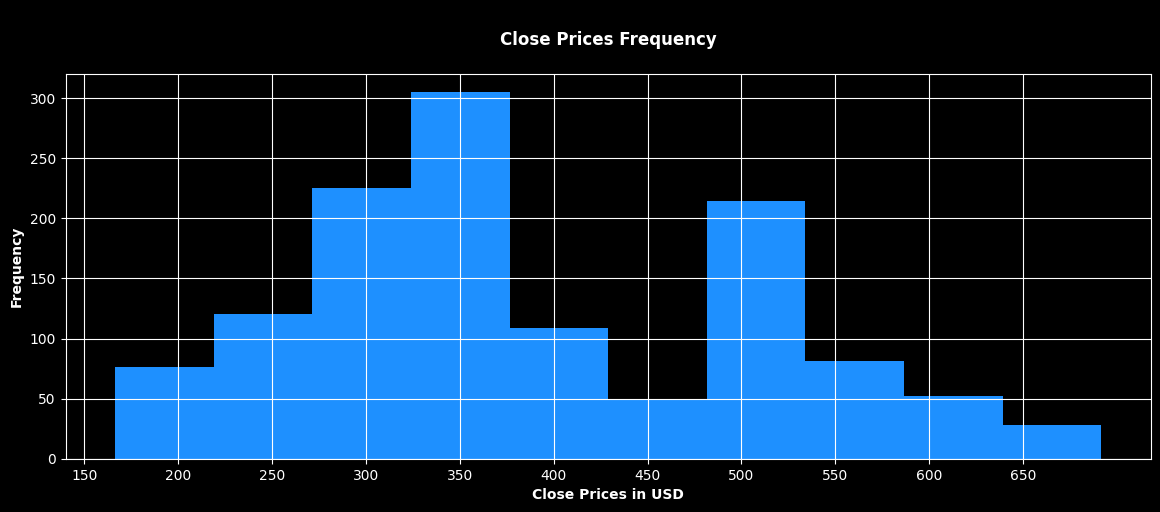

In [8]:
# Visualizing the datasets closing prices frequency
plt.figure(figsize=(14, 5))
plt.hist(NFLX_df["Close"], color="dodgerblue")
plt.xlabel("Close Prices in USD", weight="bold")
plt.ylabel("Frequency", weight="bold")
plt.title("\nClose Prices Frequency\n", weight="bold")
plt.xticks(np.arange(150, 700, 50))
plt.yticks(np.arange(0, 350, 50))
plt.grid()
plt.show()

### Bivariate Exploration

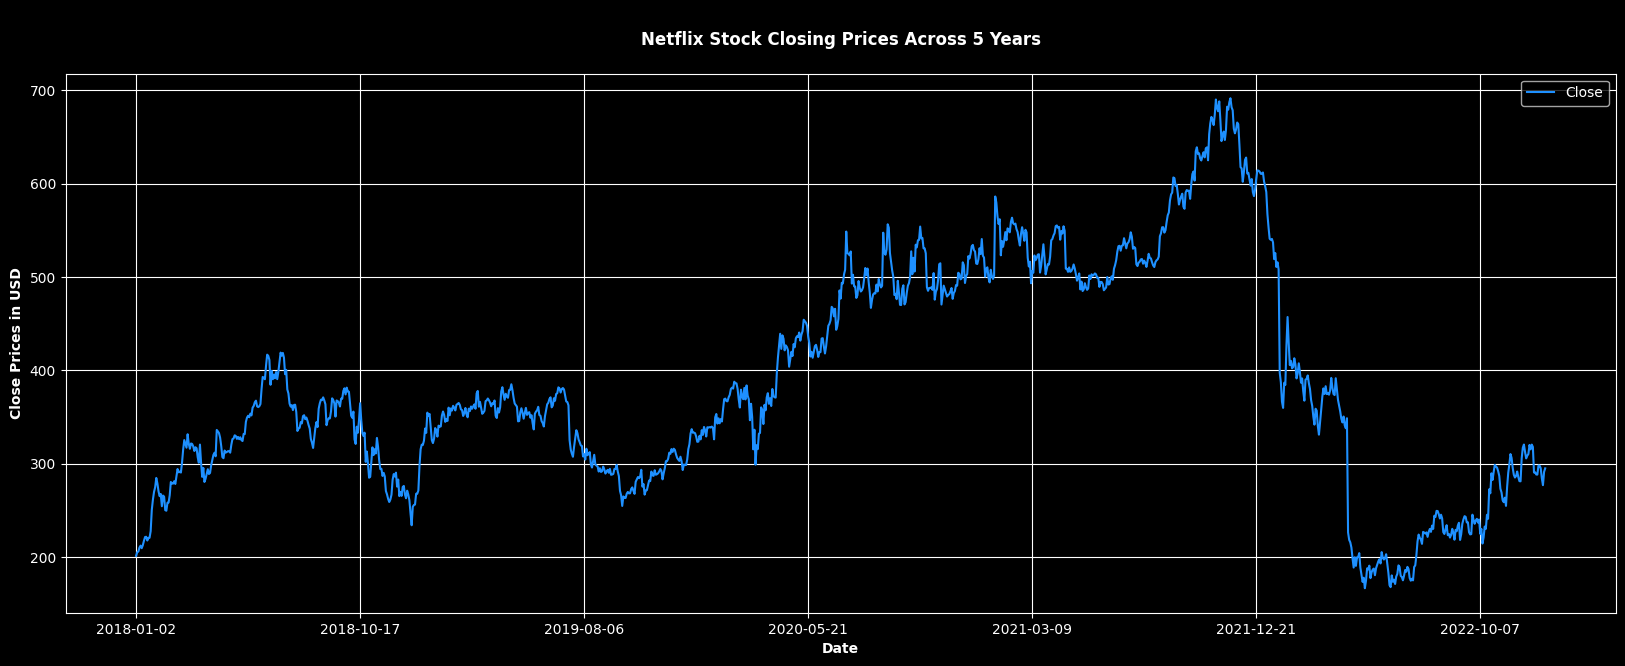

In [9]:
# Plotting the datasets closing prices against the index (Date)
NFLX_df["Close"].plot(color="dodgerblue", figsize=(20, 7))
plt.ylabel("Close Prices in USD", weight="bold")
plt.xlabel("Date", weight="bold")
plt.title("\nNetflix Stock Closing Prices Across 5 Years\n", weight="bold")
plt.grid()
plt.legend()
plt.show()

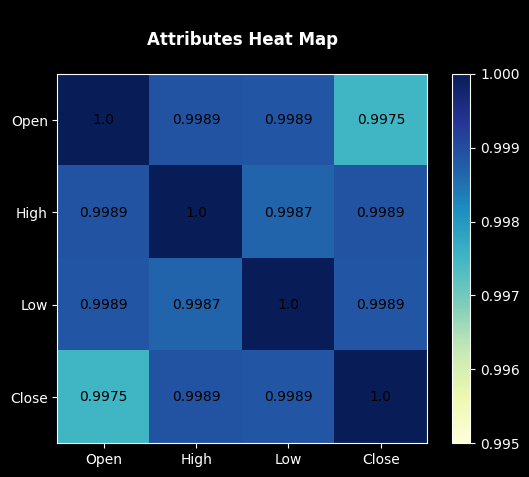

In [10]:
# Visualizing the correlation matrix through a heat map
corr = NFLX_df[["Open", "High", "Low", "Close"]].corr()
plt.imshow(corr, cmap="YlGnBu", interpolation="nearest", vmin=0.995)
plt.colorbar()

for i in range(4):
    for j in range(4):
        plt.annotate(
            str(round(corr.values[i][j], 4)),
            xy=(j, i),
            ha="center",
            va="center",
            color="black",
        )

plt.title("\nAttributes Heat Map\n", weight="bold")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

## Random Forest Regression<a id='m1'></a>

### Random Search Cross Validation

Random Search CV is a technique used in hyper-tuning the parameters, like Grid Search CV it uses k-fold as CV, but unlike it doesn't
<br> brute force its way across the hyper parameters but selects hyper parameter combination at random

In [11]:
# Hyper-Tuning the random forest regression model using randomized search cross validation
rfr = RandomForestRegressor()

# Initializing the parameter grid
rfrg = {
    "n_estimators": [20, 50, 100, 500, 1000],
    "max_depth": np.arange(1, 15, 1),
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.arange(1, 15, 2),
    "bootstrap": [True, False],
    "random_state": [1],
}

# Initializing the randomized search CV
rscv = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=rfrg,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1,
    verbose=100,
    n_iter=200,
    return_train_score=True,
    random_state=1,
)

rfr_start_time = time.time()

# Fitting the randomized search CV
rscv.fit(X_train, y_train.ravel())

rfr_elapsed_time = time.time() - rfr_start_time

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [12]:
# Obtaining the parameter values for every MSE, while also finding the best one
best_parameters = rscv.best_params_
rscv_results = rscv.cv_results_

for mean_score, parameters in zip(
    tuple(rscv_results["mean_test_score"]), tuple(rscv_results["params"])
):
    if parameters == best_parameters:
        print("Best MSE", "\t", "Best Parameters")
        print(round(-mean_score, 2), "\t\t", parameters)


print("\nMSE", "\t\t", "Parameters")
for mean_score, parameters in zip(
    tuple(rscv_results["mean_test_score"]), tuple(rscv_results["params"])
):
    print(round(-mean_score, 2), "\t\t", parameters)

Best MSE 	 Best Parameters
26.39 		 {'random_state': 1, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 9, 'bootstrap': True}

MSE 		 Parameters
186.84 		 {'random_state': 1, 'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_depth': 3, 'bootstrap': True}
115.32 		 {'random_state': 1, 'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_depth': 4, 'bootstrap': False}
36.28 		 {'random_state': 1, 'n_estimators': 50, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_depth': 9, 'bootstrap': True}
46.18 		 {'random_state': 1, 'n_estimators': 500, 'min_samples_split': 4, 'min_samples_leaf': 11, 'max_depth': 12, 'bootstrap': False}
65.8 		 {'random_state': 1, 'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 13, 'max_depth': 4, 'bootstrap': True}
3378.46 		 {'random_state': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 11, 'max_depth': 1, 'bootstrap': True}
31.82 		 {'random_state'

### Model Fitting

Random Forest Model is a supervised, ensemble, regression ML model which basically combines the output of more than one model, in this case
<br> the random forest combines decision trees then selects the outcome based on either the majority (in the case of classification) or mean 
<br> (in the case of regression) which is the case here.

In [13]:
# Initializing the random forest model with the best parameters
rfr_best = rscv.best_estimator_

rfr_best.fit(X_train, y_train.ravel())  # Fitting the final model

y_rfr_predict = rfr_best.predict(X_test)  # Predicting the testing values

### Performance Evaluation


The performance evaluation metrics that will be used for all the models in the notebook are:
<br>
<br>
MSE (Mean Squared Error): Which is the most common evaluation metrics for regression problems
<br>
MAPE (Mean Absolute Percentage Error): Which is common in stock prediction model in %
<br>
Scores (Both training and Testing): The coefficient of determination of the prediction in %
<br>
Total Computational Time: The total time took to fit the model in seconds

In [14]:
# Calculating the evaluation metrics
rfr_MSE = round(metrics.mean_squared_error(y_test, y_rfr_predict), 4)
rfr_MAPE = 100 - round(np.mean(np.abs((y_test - y_rfr_predict) / y_test)), 4)
rfr_total_time = round(rfr_elapsed_time, 4)

print("Random Forest with Random Search CV Evaluation Metrics:\n")
print("MSE:", rfr_MSE)
print("MAPE:", rfr_MAPE, "%")
print("Training Score:", round(rfr_best.score(X_train, y_train) * 100, 4), "%")
print("Testing Score:", round(rfr_best.score(X_test, y_test) * 100, 4), "%")
print("Total Computational Time on 16 Parallel Processors", rfr_total_time, "s")

Random Forest with Random Search CV Evaluation Metrics:

MSE: 22.6661
MAPE: 99.6208 %
Training Score: 99.9654 %
Testing Score: 99.8493 %
Total Computational Time on 16 Parallel Processors 100.0641 s


In [15]:
# Adding the random forest close prediction column to the original dataframe
NFLX_df["RFR Close Predictions"] = rfr_best.predict(
    NFLX_df[["Open", "High", "Low"]].values
)
NFLX_df.sample(10)

,Date,Open,High,Low,Close,RFR Close Predictions
Date,,,,,,
2019-10-25,18194.0,270.679993,277.769989,270.179993,276.820007,272.080927
2020-09-02,18507.0,553.780029,556.500000,537.369995,552.840027,549.605862
2019-09-09,18148.0,294.809998,301.549988,290.600006,294.339996,293.818799
2018-08-22,17765.0,338.489990,346.209991,337.410004,344.440002,342.890853
2019-05-31,18047.0,347.220001,349.339996,342.920013,343.279999,345.251198
2018-08-02,17745.0,337.230011,345.000000,334.709991,344.500000,342.704970
2018-08-21,17764.0,331.000000,341.500000,329.700012,338.019989,337.991221
2018-07-24,17736.0,366.940002,367.399994,354.559998,357.320007,358.091389
2021-07-02,18810.0,535.500000,538.539978,529.390015,533.979980,533.742887


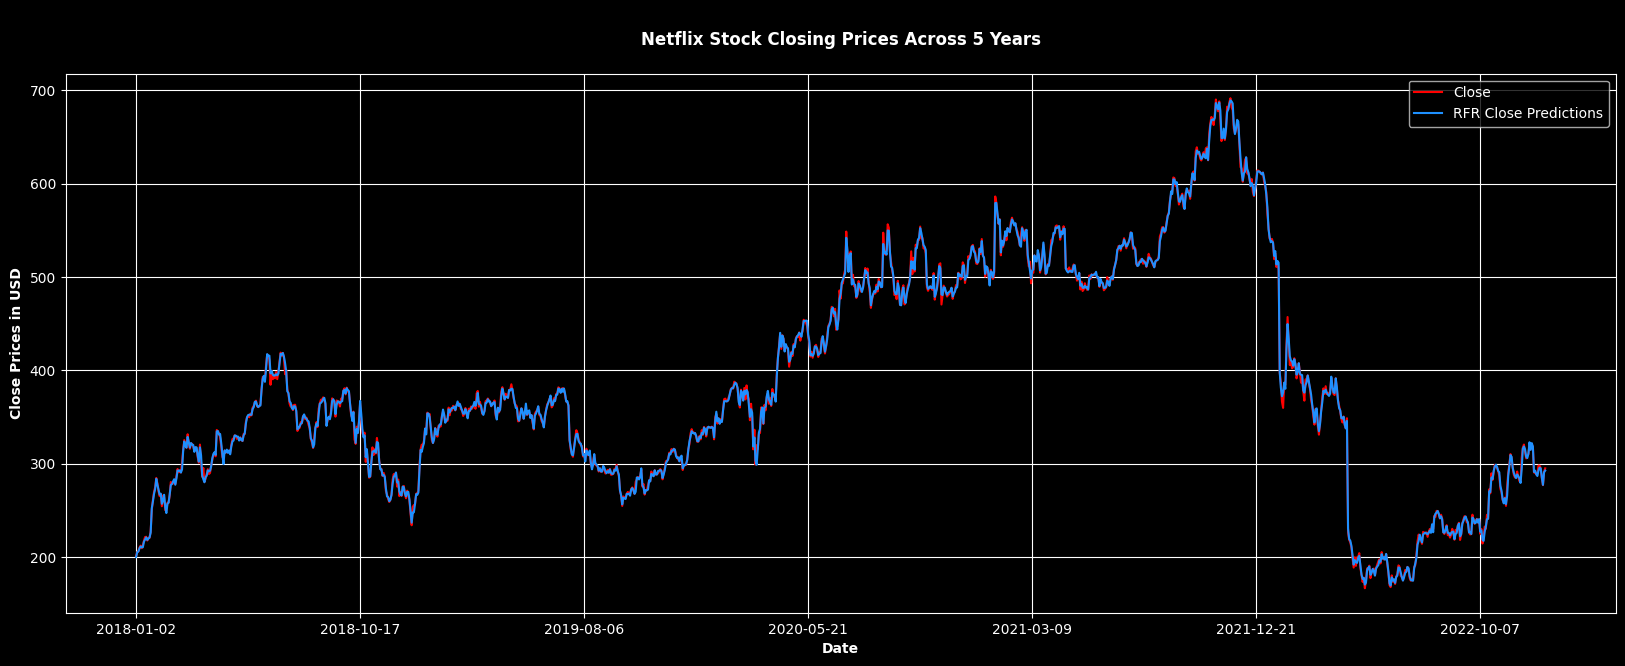

In [16]:
# Plotting the predictions and the datasets closing prices against the index (Date)
NFLX_df["Close"].plot(color="red", figsize=(20, 7))
NFLX_df["RFR Close Predictions"].plot(color="dodgerblue")

plt.xlabel("Date", weight="bold")
plt.ylabel("Close Prices in USD", weight="bold")
plt.title("\nNetflix Stock Closing Prices Across 5 Years\n", weight="bold")
plt.legend()
plt.grid()
plt.show()

## Polynomial Regression<a id='m2'></a>

### Elastic net regularization

Elastic Net regularization is a technique used in machine learning to prevent overfitting and improve the generalization of a model by limiting the
</br> model parameters, it combines two types of regularization: L1 regularization (Lasso) and L2 regularization (Ridge).

In [17]:
# Obtaining the best degree for the elastic net regularized polynomial regression model using randomized search cross validation
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
poly_MSE_list = []

print("Degree", "\t\t", "MSE")

poly_start_time = time.time()

for deg in range(1, 10):
    # Initializing the model with iterated degree
    poly = PolynomialFeatures(degree=deg)

    # Transforming the X values into a polynomial feature space (Polynomial Equation)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    elastic_net.fit(
        X_train_poly, y_train
    )  # Fitting the model elastic net regularized polynomial regression

    y_poly_predict = elastic_net.predict(X_test_poly)  # Predicting the testing values

    poly_MSE_list.append(round(metrics.mean_squared_error(y_test, y_poly_predict), 4))

    print(deg, "\t\t", poly_MSE_list[deg - 1])

poly_elapsed_time = time.time() - poly_start_time

best_degree = poly_MSE_list.index(min(poly_MSE_list)) + 1

print("\nBest Degree", "\t", "MSE")
print(best_degree, "\t\t", min(poly_MSE_list))

Degree 		 MSE
1 		 15.4166
2 		 15.7544
3 		 18.973
4 		 21.3576
5 		 21.7039
6 		 20.5722
7 		 19.2818
8 		 18.6823
9 		 18.8583

Best Degree 	 MSE
1 		 15.4166


### Model Fitting

Polynomial regression is a supervised, regression ML Model where the relationship between the independent variable and the dependent variable is modeled as an
</br> nth-degree polynomial. It allows for nonlinear relationships between the variables by fitting a curve to the data points, capturing more 
</br> complex patterns than traditional linear regression.

In [18]:
# Initializing the polynomial regression model with the best degree
elastic_net_best = ElasticNet(alpha=1.0, l1_ratio=0.5)
poly_best = PolynomialFeatures(degree=best_degree)

# Fitting the final model
X_train_poly_best = poly_best.fit_transform(X_train)
elastic_net_best.fit(X_train_poly_best, y_train)

# Predicting the testing values
X_test_poly_best = poly_best.transform(X_test)
y_poly_predict = elastic_net_best.predict(X_test_poly_best)

### Performance Evaluation

In [19]:
# Calculating the evaluation metrics
poly_MSE = round(metrics.mean_squared_error(y_test, y_poly_predict), 4)
poly_MAPE = 100 - round(np.mean(np.abs((y_test - y_poly_predict) / y_test)), 4)
poly_total_time = round(poly_elapsed_time, 4)

print("Polynomial Regression with elastic net regularization Evaluation Metrics:\n")
print("MSE:", poly_MSE)
print("MAPE:", poly_MAPE, "%")
print(
    "Training Score:",
    round(elastic_net_best.score(X_train_poly_best, y_train) * 100, 4),
    "%",
)
print(
    "Testing Score:",
    round(elastic_net_best.score(X_test_poly_best, y_test) * 100, 4),
    "%",
)
print("Total Computational Time", poly_total_time, "s")

Polynomial Regression with elastic net regularization Evaluation Metrics:

MSE: 15.4166
MAPE: 99.6214 %
Training Score: 99.8829 %
Testing Score: 99.8975 %
Total Computational Time 0.3693 s


In [20]:
# Adding the polynomial regression close prediction column to the original dataframe
NFLX_df["Polynomial Close Predictions"] = elastic_net_best.predict(
    poly_best.transform(NFLX_df[["Open", "High", "Low"]])
)
NFLX_df.sample(10)

,Date,Open,High,Low,Close,RFR Close Predictions,Polynomial Close Predictions
Date,,,,,,,
2021-04-22,18739.0,513.820007,513.960022,500.549988,508.779999,506.397269,504.843542
2018-03-27,17617.0,322.489990,322.899994,297.000000,300.690002,308.837127,307.899898
2021-08-31,18870.0,566.119995,569.479980,561.609985,569.190002,567.964050,564.284013
2022-08-26,19230.0,233.630005,236.949997,223.149994,223.279999,225.723541,229.591059
2018-10-19,17823.0,351.000000,355.799988,332.200012,332.670013,336.834672,343.521168
2018-12-21,17886.0,263.829987,264.500000,241.289993,246.389999,248.893250,251.168951
2020-09-15,18520.0,484.000000,497.470001,481.630005,495.989990,493.297913,492.028161
2019-07-18,18095.0,323.760010,329.850006,320.299988,325.209991,325.000325,325.464799
2019-04-26,18012.0,368.350006,375.140015,366.239990,374.850006,371.822915,371.222178


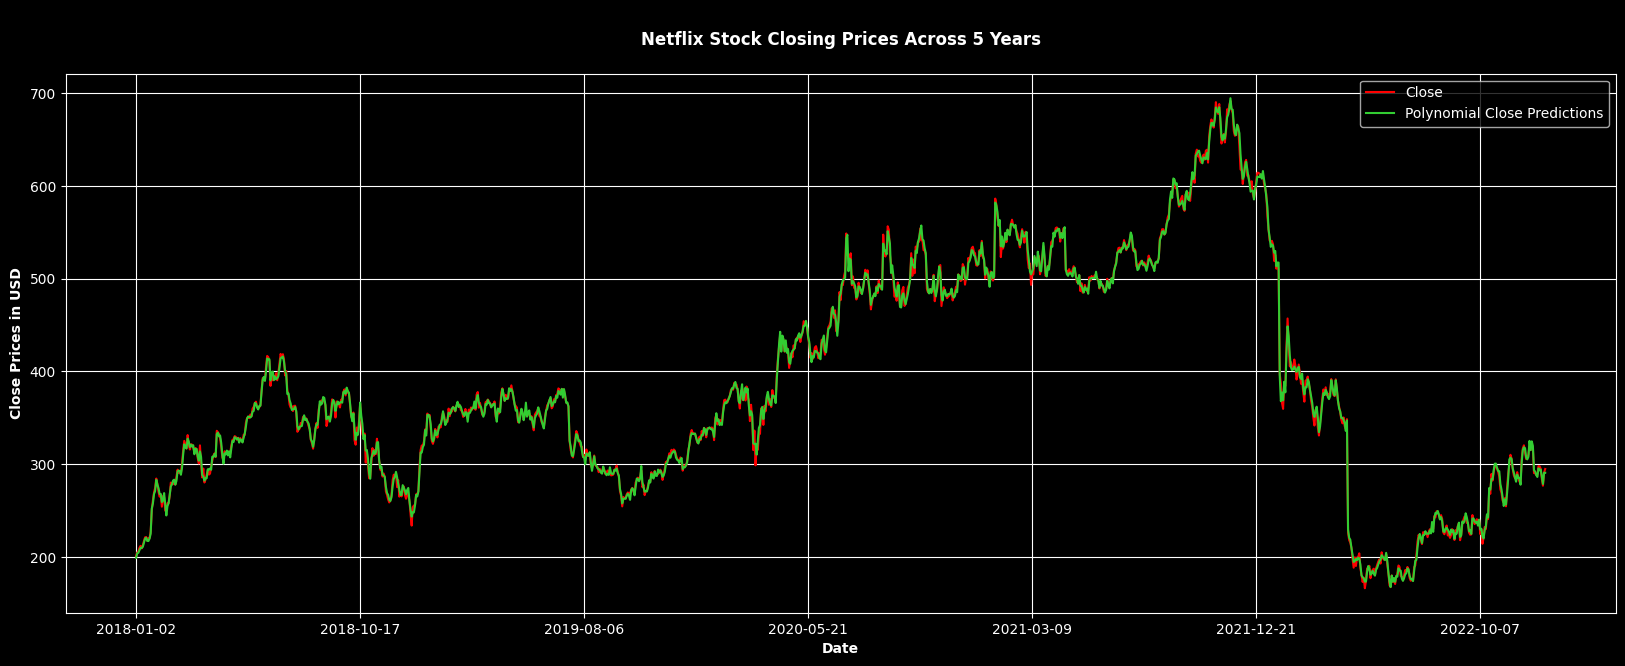

In [21]:
# Plotting the predictions and the datasets closing prices against the index (Date)
NFLX_df["Close"].plot(color="red", figsize=(20, 7))
NFLX_df["Polynomial Close Predictions"].plot(color="limegreen")

plt.xlabel("Date", weight="bold")
plt.ylabel("Close Prices in USD", weight="bold")
plt.title("\nNetflix Stock Closing Prices Across 5 Years\n", weight="bold")
plt.legend()
plt.grid()
plt.show()

## Ada Boost<a id='m3'></a>

### Model Fitting

AdaBoost, short for Adaptive Boosting, is a supervised, ensemble, regression ML model that combines multiple "weak" models to create a "strong" model.
</br> It does this by sequentially training the weak learners on different versions of the data, with each subsequent weak learner focusing more on
</br> the samples that were misclassified by the previous learners.

In [22]:
# Initializing the ada boost model with the best random forest parameters as the estimator
ada_boost = AdaBoostRegressor(estimator=rfr_best, n_estimators=50, random_state=1)

ada_start_time = time.time()

ada_boost.fit(X_train, y_train)  # Fitting the final model

ada_elapsed_time = time.time() - ada_start_time

y_ada_predict = ada_boost.predict(X_test)  # Predicting the testing values

### Performance Evaluation

In [23]:
# Calculating the evaluation metrics
ada_MSE = round(metrics.mean_squared_error(y_test, y_ada_predict), 4)
ada_MAPE = 100 - round(np.mean(np.abs((y_test - y_ada_predict) / y_test)), 4)
ada_total_time = round(ada_elapsed_time, 4)

print(
    "Ada Boost with the best random forest parameters as the estimator Evaluation Metrics:\n"
)
print("MSE:", ada_MSE)
print("MAPE:", ada_MAPE, "%")
print("Training Score:", round(ada_boost.score(X_train, y_train) * 100, 4), "%")
print("Testing Score:", round(ada_boost.score(X_test, y_test) * 100, 4), "%")
print("Total Computational Time", ada_total_time, "s")

Ada Boost with the best random forest parameters as the estimator Evaluation Metrics:

MSE: 22.6992
MAPE: 99.6206 %
Training Score: 99.9815 %
Testing Score: 99.8491 %
Total Computational Time 48.1673 s


In [24]:
# Adding the Ada Boost close prediction column to the original dataframe
NFLX_df["Ada Close Predictions"] = ada_boost.predict(NFLX_df[["Open", "High", "Low"]])
NFLX_df.sample(10)

,Date,Open,High,Low,Close,RFR Close Predictions,Polynomial Close Predictions,Ada Close Predictions
Date,,,,,,,,
2018-11-15,17850.0,285.510010,292.500000,282.160004,290.059998,287.980113,288.139398,288.534345
2022-02-16,19039.0,401.529999,401.559998,390.380005,398.079987,396.202639,393.890734,396.178243
2020-06-26,18439.0,466.390015,468.029999,442.239990,443.399994,449.457285,453.123866,444.182222
2020-08-21,18495.0,496.459991,498.130005,490.000000,492.309998,494.277993,492.381415,494.890584
2018-06-27,17709.0,407.559998,411.589996,390.000000,390.390015,395.259312,399.919369,391.380841
2020-04-22,18374.0,429.730011,433.000000,413.000000,421.420013,420.143182,421.820085,418.766843
2018-02-12,17574.0,252.139999,259.149994,249.000000,257.950012,256.994917,254.991548,256.577139
2021-04-09,18726.0,552.690002,556.900024,547.109985,555.309998,552.525738,551.048596,551.297835
2021-07-26,18834.0,514.380005,521.130005,509.010010,516.489990,516.468103,515.096133,517.605979


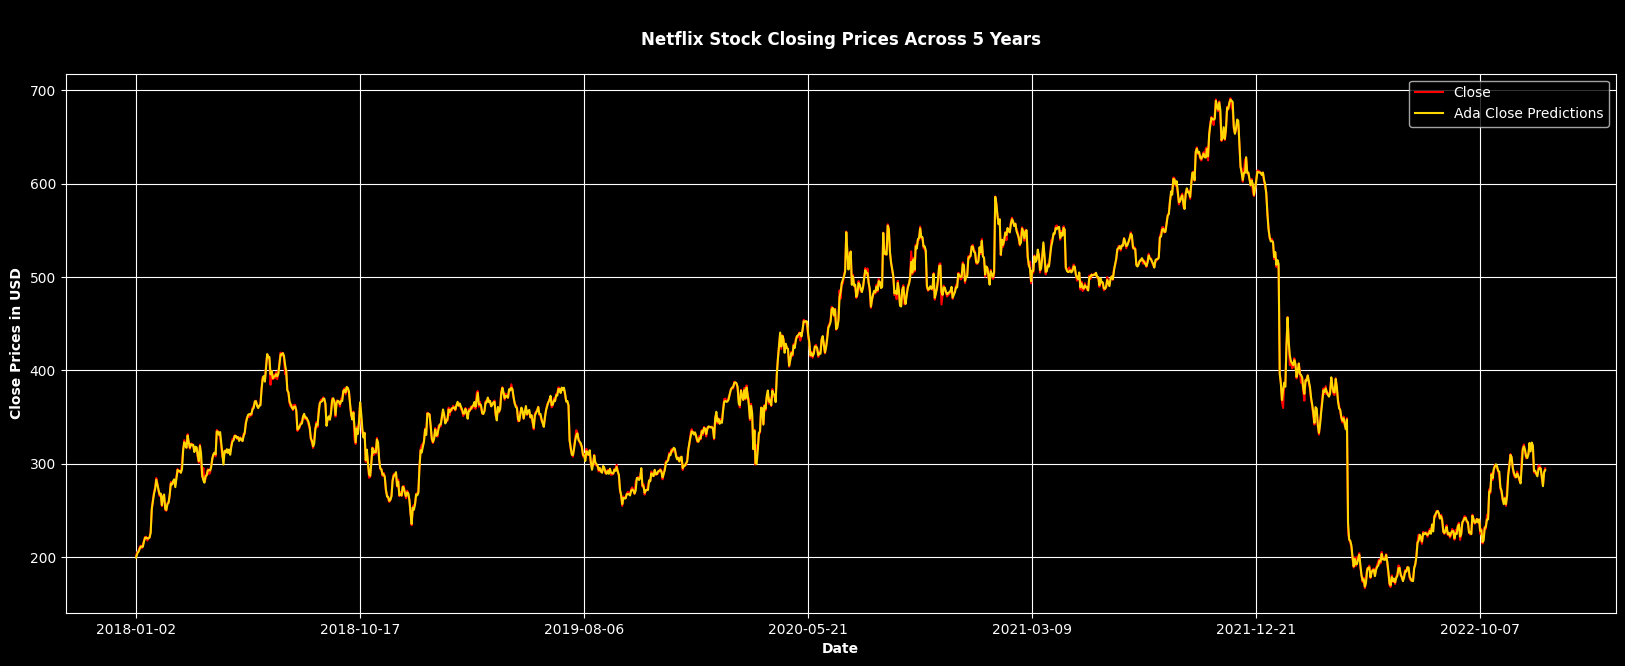

In [25]:
# Plotting the predictions and the datasets closing prices against the index (Date)
NFLX_df["Close"].plot(color="red", figsize=(20, 7))
NFLX_df["Ada Close Predictions"].plot(color="gold")

plt.xlabel("Date", weight="bold")
plt.ylabel("Close Prices in USD", weight="bold")
plt.title("\nNetflix Stock Closing Prices Across 5 Years\n", weight="bold")
plt.legend()
plt.grid()
plt.show()

## Model Comparison<a id='compare'></a>

In [26]:
# Initializing a nested dictionary with all the evaluation metrics values
all_metrics = {
    "MSE": {"Random Forest": rfr_MSE, "Polynomial": poly_MSE, "Ada boost": ada_MSE},
    "MAPE": {"Random Forest": rfr_MAPE, "Polynomial": poly_MAPE, "Ada boost": ada_MAPE},
    "Total Time": {
        "Random Forest": rfr_total_time,
        "Polynomial": poly_total_time,
        "Ada boost": ada_total_time,
    },
}

In [27]:
# Getting the minimum and the maximum MSE
min_MSE = min(all_metrics["MSE"].values())
min_MSE_model = [i for i in all_metrics["MSE"] if all_metrics["MSE"][i] == min_MSE][0]
print("The regression model with the least MSE is", min_MSE_model, "which is:", min_MSE)

max_MSE = max(all_metrics["MSE"].values())
max_MSE_model = [i for i in all_metrics["MSE"] if all_metrics["MSE"][i] == max_MSE][0]
print("The regression model with the most MSE is", max_MSE_model, "which is:", max_MSE)

The regression model with the least MSE is Polynomial which is: 15.4166
The regression model with the most MSE is Ada boost which is: 22.6992


In [28]:
# Getting the minimum and the maximum MAPE
min_MAPE = min(all_metrics["MAPE"].values())
min_MAPE_model = [i for i in all_metrics["MAPE"] if all_metrics["MAPE"][i] == min_MAPE][
    0
]
print(
    "The regression model with the least MAPE is",
    min_MAPE_model,
    "which is:",
    min_MAPE,
    "%",
)

max_MAPE = max(all_metrics["MAPE"].values())
max_MAPE_model = [i for i in all_metrics["MAPE"] if all_metrics["MAPE"][i] == max_MAPE][
    0
]
print(
    "The regression model with the most MAPE is",
    max_MAPE_model,
    "which is:",
    max_MAPE,
    "%",
)

The regression model with the least MAPE is Ada boost which is: 99.6206 %
The regression model with the most MAPE is Polynomial which is: 99.6214 %


In [29]:
# Getting the minimum and the maximum computational time
min_time = min(all_metrics["Total Time"].values())
min_time_model = [
    i for i in all_metrics["Total Time"] if all_metrics["Total Time"][i] == min_time
][0]
print(
    "The regression model with the least computational time is",
    min_time_model,
    "which is:",
    min_time,
    "s",
)

max_time = max(all_metrics["Total Time"].values())
max_time_model = [
    i for i in all_metrics["Total Time"] if all_metrics["Total Time"][i] == max_time
][0]
print(
    "The regression model with the most computational time is",
    max_time_model,
    "which is:",
    max_time,
    "s",
)

The regression model with the least computational time is Polynomial which is: 0.3693 s
The regression model with the most computational time is Random Forest which is: 100.0641 s


In [30]:
# Showing the final dataframe with all the models results
NFLX_df.to_csv("NFLX_Final.csv")
NFLX_df.sample(10)

,Date,Open,High,Low,Close,RFR Close Predictions,Polynomial Close Predictions,Ada Close Predictions
Date,,,,,,,,
2022-11-14,19310.0,290.000000,311.000000,288.190002,299.269989,297.108197,305.214784,297.490341
2021-11-04,18935.0,685.890015,685.940002,665.500000,668.400024,678.557354,672.622834,679.225596
2021-02-08,18666.0,555.000000,555.000000,543.700012,547.919983,548.185924,546.817724,547.876768
2018-03-26,17616.0,309.359985,321.029999,302.000000,320.350006,317.366882,313.764153,318.935882
2018-04-25,17646.0,306.369995,309.980011,292.619995,305.760010,299.442753,300.657391,298.977062
2019-03-11,17966.0,352.000000,358.980011,350.029999,358.859985,356.390654,355.152114,356.727842
2022-05-20,19132.0,185.869995,190.190002,179.770004,186.350006,187.069061,185.099431,185.705003
2019-11-11,18211.0,289.160004,296.359985,288.500000,294.179993,293.249644,293.362043,293.218753
2018-12-27,17892.0,250.110001,255.589996,240.100006,255.570007,247.803800,248.087817,250.507859


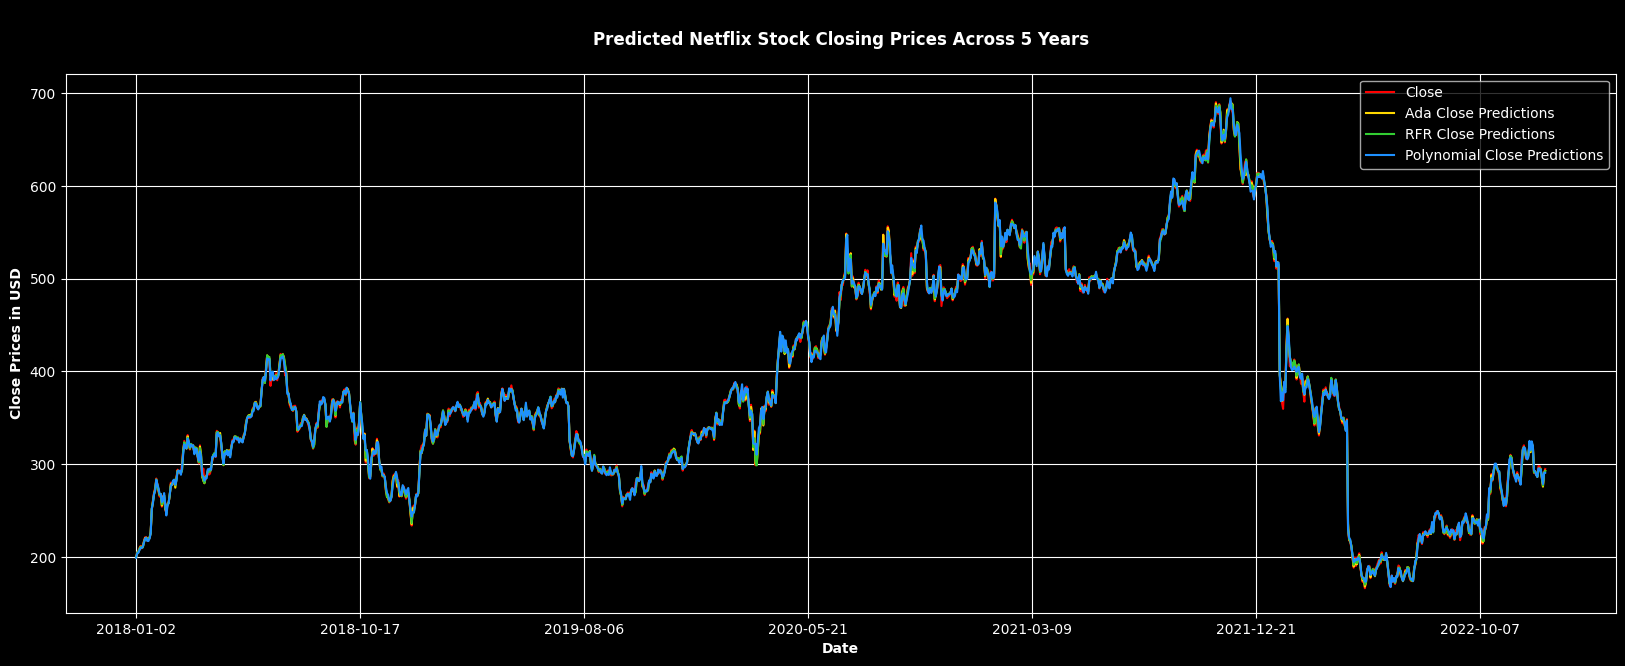

In [31]:
# Plotting all the predictions and the datasets closing prices against the index (Date)
NFLX_df["Close"].plot(color="red", figsize=(20, 7))
NFLX_df["Ada Close Predictions"].plot(color="gold")
NFLX_df["RFR Close Predictions"].plot(color="limegreen")
NFLX_df["Polynomial Close Predictions"].plot(color="dodgerblue")

plt.xlabel("Date", weight="bold")
plt.ylabel("Close Prices in USD", weight="bold")
plt.title("\nPredicted Netflix Stock Closing Prices Across 5 Years\n", weight="bold")
plt.legend()
plt.grid()
plt.show()